# Pociecie obrazow na mniejsze

## Pociecie orto wykonywane jest w taki sposób aby zachować współrzedne globalne 

### Przygotowanie danych

<p style="text-align: justify">
Obliczenia zostały  przeprowadzone przy użyciu oprogramowania <b><i>Jupyter Notebook</b></i> Umożliwia ono tworzenie plików notatnika Jupyter <i>.ipynb</i> (są to pliki łączące pisanie kodu wraz z dokumentacją tekstową).
</p>
<p style="text-align: justify">
Notebooka użyłem ponieważ chciałem w przejrzysty sposób przedstawić dane, a Jupyter jest jedną z najpopularniejszych obecnie opcji prezentacji wyników analiz na zbiorach danych. Język programowania wykorzystanym przeze mnie jest język Python.
</p>

In [1]:
import glob, os
from PIL import Image, ImageDraw ,ImageSequence
import numpy as np

import pandas as pd
import cv2

In [10]:
bulidngs = glob.glob(r"E:\Uczelnia\Magister\Semestr1\ZMAP\Praca_semestralna\Datasets\Dataset_1_out\*\*\*.jpg")
len(bulidngs)

14400

In [11]:
def rescale(file):
    img = cv2.imread(file)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  
    dim = (224,224)
    out = file[:-4]+".jpg"
    print(out)
    resized = cv2.resize(gray, dim, interpolation = cv2.INTER_AREA)
    os.remove(file)
    cv2.imwrite(out, resized)
    


In [6]:
tiff =r"E:\Uczelnia\Magister\Semestr1\ZMAP\Praca_semestralna\QGis\64920_432835_6.151.11.3.tif"  
tiff = cv2.imread(tiff)
cv2.imwrite(r"E:\Uczelnia\Magister\Semestr1\ZMAP\Praca_semestralna\Datasets\Pred_wroc\No_referenc_orotfoto\64920_432835_6.151.11.3.tif",tiff)

True

In [7]:
class ImgParser:
    INPUT_FOLDER_PATH = r"E:\Uczelnia\Magister\Semestr1\ZMAP\Praca_semestralna\Datasets\Pred_wroc\No_referenc_orotfoto\*.tif" 
    OUTPUT_FOLDER_PATH = r"E:\Uczelnia\Magister\Semestr1\ZMAP\Praca_semestralna\Datasets\Pred_wroc\cutted_images\\"
    Image.MAX_IMAGE_PIXELS = None
    CUT_SIZE = 448
    OFFSET_X = 0
    OFFSET_Y = 0
    COLOR_VAL = 180
    QUANTITY = 800


    @staticmethod
    def cut_images():
        all_ctr = 0
        for file_path in glob.glob(ImgParser.INPUT_FOLDER_PATH):
            print(file_path)
            def next_coord(val, std_offset, max):
                new  = val + ImgParser.CUT_SIZE
                return new if new < max else std_offset

            file_name = "".join(file_path.split('\\')[-1][:-4])
            #try:
            #image= gdal.Open(file_path).ReadAsArray()


            image  = cv2.imread(file_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        
            imgWidth, imgHeight = image.shape
            print("Img size: ", imgWidth, imgHeight)
            cut_ctr = 0
            move = int(ImgParser.CUT_SIZE*0.6)
            for x in range(0, imgWidth-112,move):
                for y in range(0, imgWidth-112,move):
                    cuttedImage = image[y:y+ImgParser.CUT_SIZE, x:x+ImgParser.CUT_SIZE]
                    dim =(224,224)
                    cuttedImage = cv2.resize(cuttedImage, dim, interpolation = cv2.INTER_AREA)

                    pthTemp = ImgParser.OUTPUT_FOLDER_PATH+file_name+"_"+str(x)+"_"+str(y)+".tif"
                    cv2.imwrite(pthTemp, cuttedImage)
                
            #except:
               #pass



In [8]:
ImgParser.cut_images()

E:\Uczelnia\Magister\Semestr1\ZMAP\Praca_semestralna\Datasets\Pred_wroc\No_referenc_orotfoto\5645_187186_M-33-35-C-a-3_1.tif
Img size:  24999 24999


In [6]:
tiff =r"E:\Uczelnia\Magister\Semestr1\ZMAP\Praca_semestralna\QGis\*.tif"  
tiff = cv2.imread(tiff)


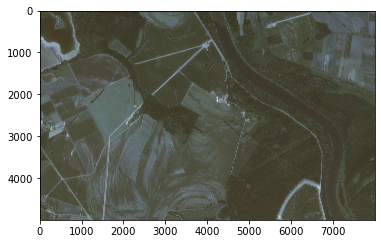

In [5]:
import matplotlib.pyplot as plt
imgplot = plt.imshow(tiff)
plt.show()
